In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Recognizing Data

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:xlabel='price'>

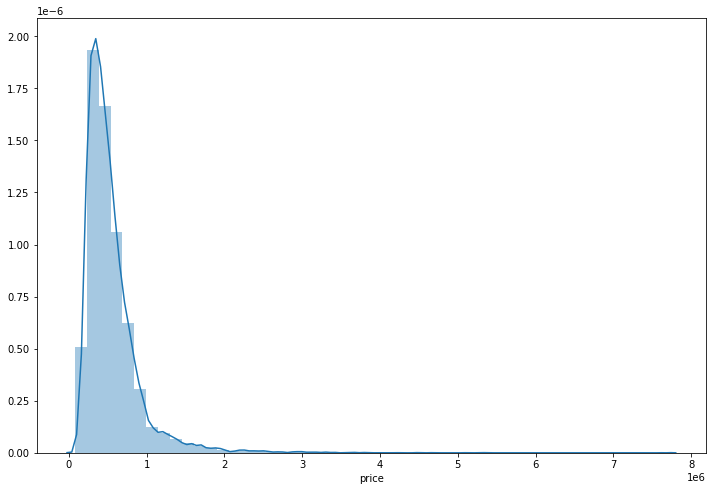

In [7]:
plt.figure(figsize = (12, 8))
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

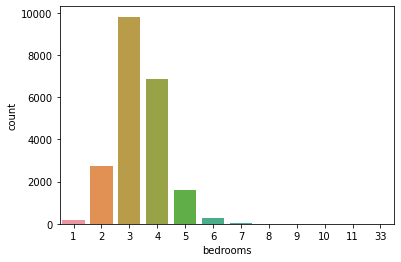

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

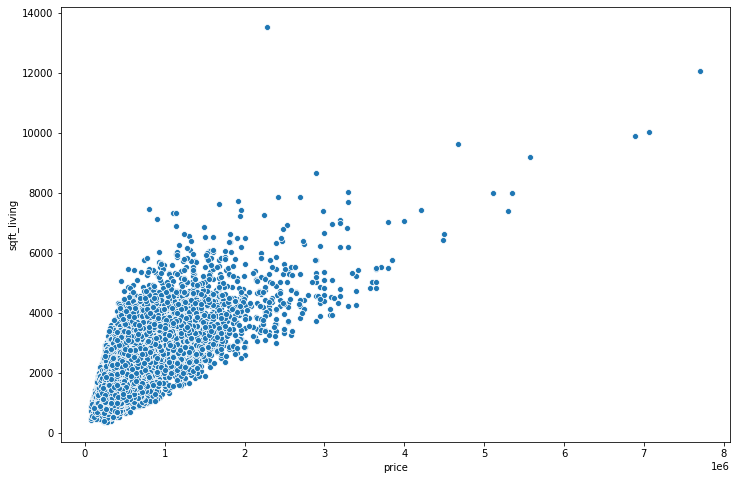

In [11]:
plt.figure(figsize = (12, 8))
sns.scatterplot('price', 'sqft_living', data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

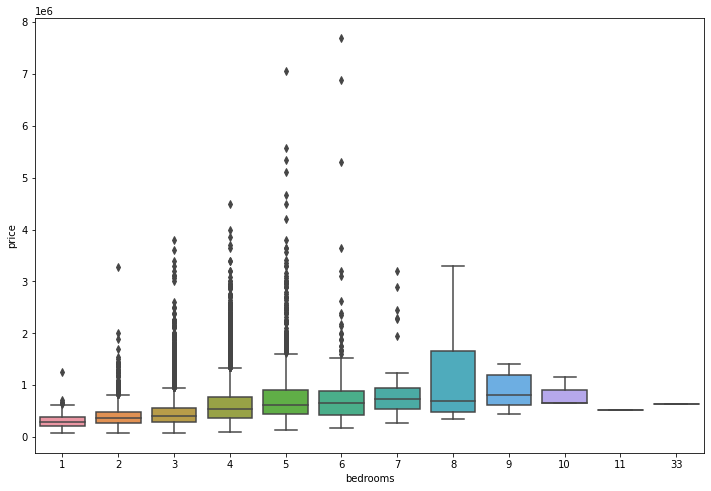

In [12]:
plt.figure(figsize = (12, 8))
sns.boxplot('bedrooms', 'price', data = df)

In [13]:
import folium
folium.Map(location=[df["lat"].mean(),df["long"].mean()], zoom_start=8)

<AxesSubplot:xlabel='long', ylabel='lat'>

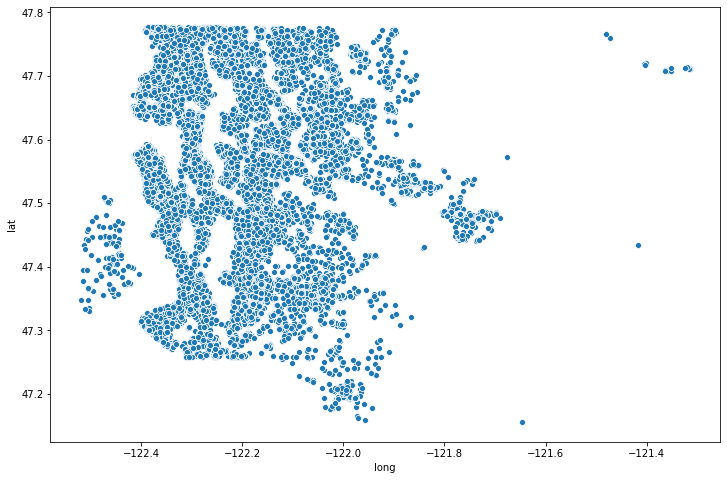

In [14]:
plt.figure(figsize = (12, 8))
sns.scatterplot('long', 'lat', data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

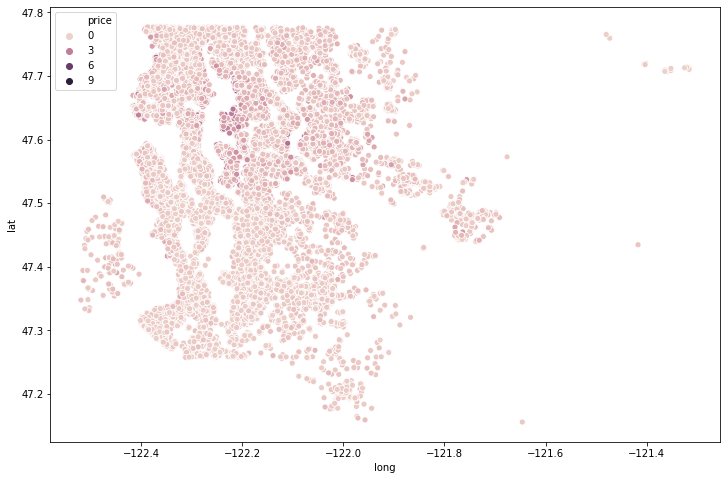

In [15]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

## Feature Engineering

In [16]:
df = df.drop('id', axis = 1)

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df['year'] = df['date'].apply(lambda x : x.year)
df['month'] = df['date'].apply(lambda x : x.month)

In [19]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

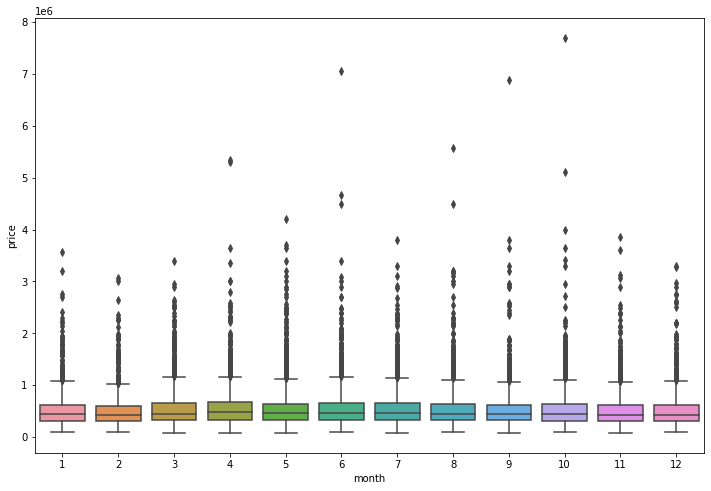

In [20]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'month', y = 'price', data = df)

<AxesSubplot:xlabel='month'>

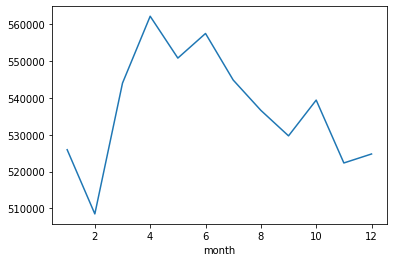

In [21]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

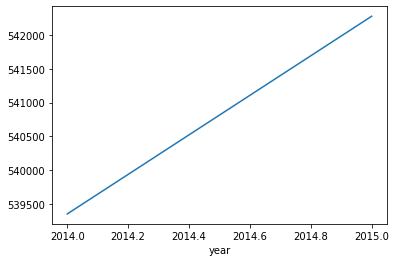

In [22]:
df.groupby('year').mean()['price'].plot()

In [23]:
df = df.drop('date', axis = 1)

In [24]:
df = df.drop('zipcode', axis = 1)

## Split, Scale and Train Data

In [25]:
X = df.drop('price', axis = 1)
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_test

array([[0.2       , 0.03333333, 0.03644647, ..., 0.0088806 , 1.        ,
        0.09090909],
       [0.2       , 0.06666667, 0.08656036, ..., 0.00581357, 0.        ,
        0.81818182],
       [0.3       , 0.23333333, 0.1078208 , ..., 0.05679519, 1.        ,
        0.18181818],
       ...,
       [0.2       , 0.16666667, 0.09339408, ..., 0.00855667, 0.        ,
        0.45454545],
       [0.4       , 0.4       , 0.18147304, ..., 0.00452128, 0.        ,
        0.63636364],
       [0.1       , 0.16666667, 0.0523918 , ..., 0.01849063, 0.        ,
        0.36363636]])

## Creating Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [34]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

opt = Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = 'mse')

In [35]:
model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test),
         batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 300376489984.0000 - val_loss: 96827187200.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 87212580864.0000 - val_loss: 78670356480.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 68994097152.0000 - val_loss: 61276778496.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 53783076864.0000 - val_loss: 51622408192.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 47144312832.0000 - val_loss: 46878932992.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 43340210176.0000 - val_loss: 43585949696.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 40716419072.0000 - val_loss: 41547948032.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 38275407872.0000 - val_loss: 40124534784.0000
Epoch 9/400
119/119 [==========

119/119 [==============================] - 0s 1ms/step - loss: 27498639360.0000 - val_loss: 30354264064.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 27044470784.0000 - val_loss: 29026719744.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 26873651200.0000 - val_loss: 28979603456.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 26771953664.0000 - val_loss: 29791510528.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 27129176064.0000 - val_loss: 28904175616.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 26747496448.0000 - val_loss: 28792291328.0000
Epoch 74/400
119/119 [==============================] - 0s 4ms/step - loss: 26738257920.0000 - val_loss: 28618817536.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 26450511872.0000 - val_loss: 29574842368.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 24771620864.0000 - val_loss: 29286961152.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 24739903488.0000 - val_loss: 29201436672.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 24768618496.0000 - val_loss: 29210445824.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 24955451392.0000 - val_loss: 30069360640.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 24580358144.0000 - val_loss: 29687814144.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 24611102720.0000 - val_loss: 29400285184.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 24582123520.0000 - val_loss: 29273812992.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 25097353216.0000 - val_loss: 29160640512.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 24214710272.0000 - val_loss: 30672297984.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 24024410112.0000 - val_loss: 30023276544.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 24139735040.0000 - val_loss: 29665599488.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 24263391232.0000 - val_loss: 30283155456.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 24177012736.0000 - val_loss: 29738127360.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 24318507008.0000 - val_loss: 30545694720.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 24273917952.0000 - val_loss: 29798805504.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 24217657344.0000 - val_loss: 29602396160.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 23945691136.0000 - val_loss: 30090711040.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 23704573952.0000 - val_loss: 30019006464.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 23922542592.0000 - val_loss: 29890164736.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 23960733696.0000 - val_loss: 30481938432.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 23903330304.0000 - val_loss: 29946429440.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 23873196032.0000 - val_loss: 29618255872.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 23662411776.0000 - val_loss: 29839652864.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 23812724736.0000 - val_loss: 30589040640.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 17486641152.0000 - val_loss: 22889881600.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 17473269760.0000 - val_loss: 23001423872.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 17497790464.0000 - val_loss: 23916206080.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 17778868224.0000 - val_loss: 23523821568.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 17454456832.0000 - val_loss: 22523596800.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 17538574336.0000 - val_loss: 22529519616.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 17816958976.0000 - val_loss: 22645252096.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 17646229504.0000 - val_loss: 22740322304.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 17103323136.0000 - val_loss: 22674243584.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 17391591424.0000 - val_loss: 22249766912.0000


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
dot_img_file = '/tmp/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses.head()

,loss,val_loss
0,3.003765e+11,9.682719e+10
1,8.721258e+10,7.867036e+10
2,6.899410e+10,6.127678e+10
3,5.378308e+10,5.162241e+10
4,4.714431e+10,4.687893e+10


<AxesSubplot:>

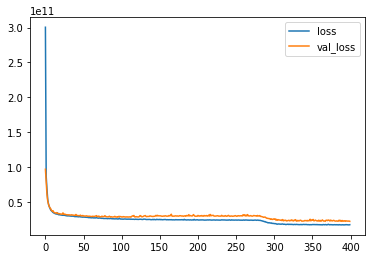

In [41]:
losses.plot()

## Evaluation

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [43]:
y_pred = model.predict(X_test)

In [44]:
mean_absolute_error(y_test, y_pred)

81986.53425172405

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

149163.56316358253

In [46]:
df['price'].mean()

540296.5735055795

In [48]:
explained_variance_score(y_test, y_pred)

0.8325478228413751

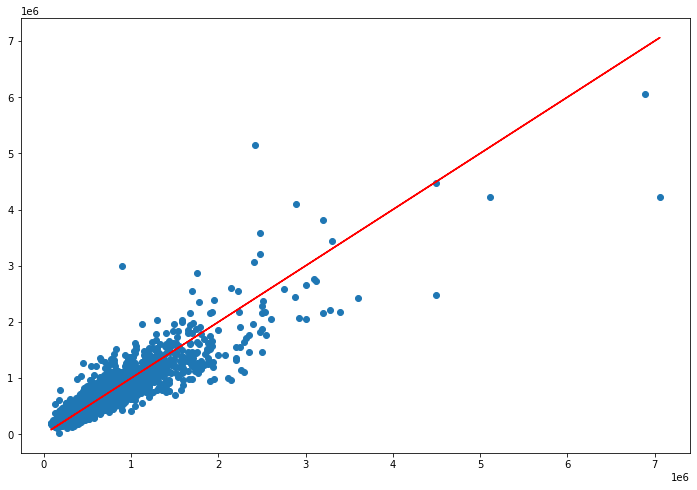

In [51]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')

In [52]:
single_house = df.drop('price',axis=1).iloc[0]

In [53]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [54]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

model.predict(single_house)

array([[248724.53]], dtype=float32)

In [55]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64